# 2 - COMPUTER VISION - Distortion Correction and Perspective transform
    The aim of this program is to undistort the image and transform perspective automatically


In [24]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [70]:
def corners_unwarp(img, nx, ny, mtx, dist):
    '''
    img - the image which we are going to transform
    nx - number of corners on the chessboard in a row
    ny - number of corners on the chessboard in a column
    mtx - camera intrinsic matrix found during camera-calibration
    dist - vector of distortion coefficients
    '''

    # 1) Undistort using mtx and dist
    img_undistored = cv2.undistort(img, mtx, dist, None, mtx)

    # 2) Convert to grayscale
    gray = cv2.cvtColor(img_undistored, cv2.COLOR_BGR2GRAY)

    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(img_undistored, (nx, ny), None)

    # 4) If corners found: 
    if ret == True:
        # a) draw corners
        cv2.drawChessboardCorners(img_undistored, (nx, ny), corners, ret)

        # b) define 4 source points 
            # I am taking the outer four detected corners
        src = np.float32(
            [corners[0], 
            corners[nx-1], 
            corners[-1], 
            corners[-nx]])

        # c) define 4 destination pointS
            # For destination points, I'm choosing the arbitrarily points which are a nice fit for displaying warped result 
            # Not the best sollution, but in this case is close enough

            # Additionally I choose offset from image corners to plot detected corners 
            # This should be chosen to present the result at the proper aspect ratio
            # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100
        img_size = (gray.shape[1], gray.shape[0])
        dst = np.float32(
            [
                [offset, offset], 
                [img_size[0]-offset, offset], 
                [img_size[0]-offset, img_size[1]-offset], 
                [offset, img_size[1]-offset]])

        # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
        M = cv2.getPerspectiveTransform(src, dst)

        # e) use cv2.warpPerspective() to warp your image to a top-down view
        warped = cv2.warpPerspective(img_undistored, M, img_size)     

    return warped, M

In [71]:
# Read in the saved camera matrix and distortion coefficients
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

# Read in an image
img = cv2.imread('images/perspective_transform/test_image2.png')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

In [72]:
top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)

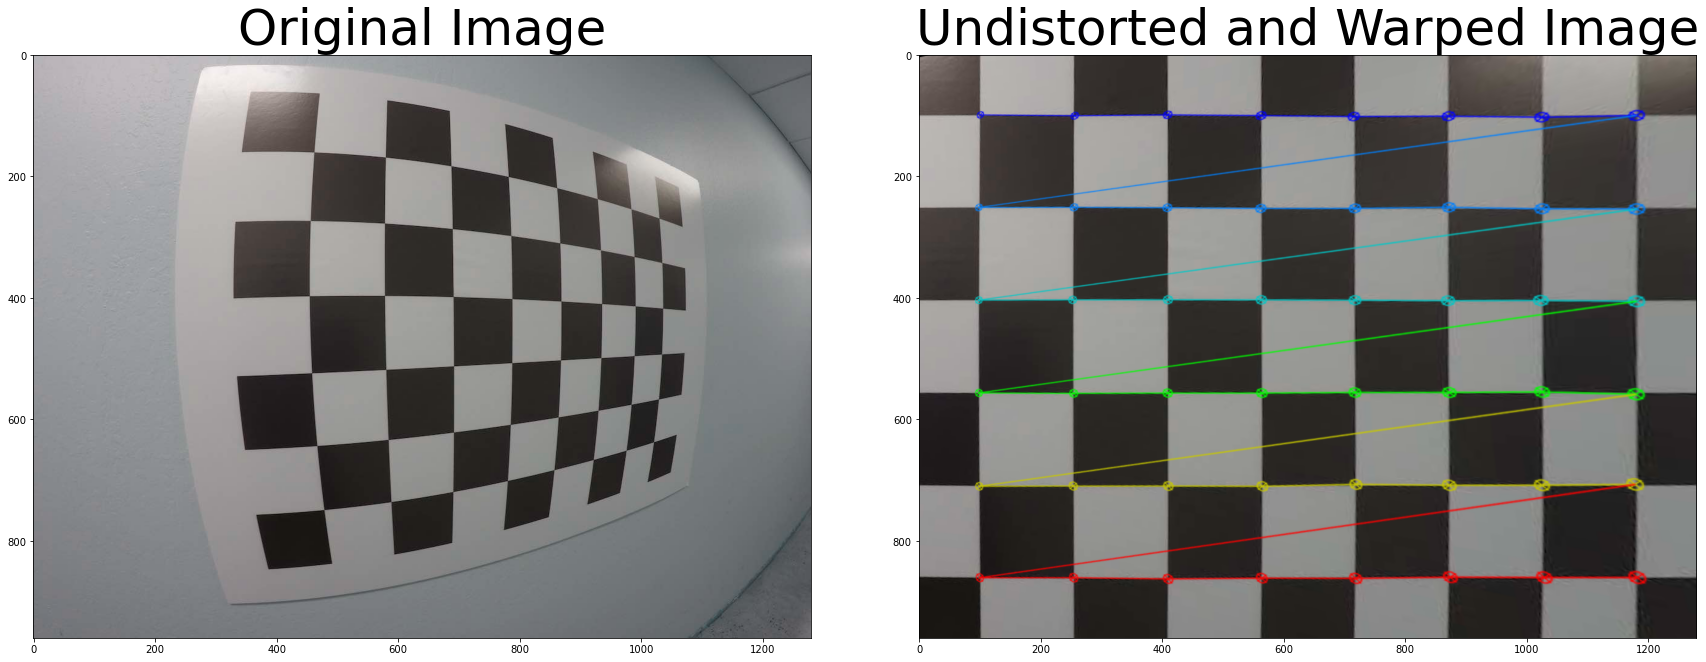

In [73]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)